# **Project Name**    - 



##### **Project Type**    - Classification (Email Campaign Effectiveness Prediction)
##### **Contribution**    - Individual (Mohd Arham Islam)


# **Project Summary -**

The aim of this machine learning (ML) project is to develop a model that can effectively analyze and track emails sent as part of Gmail-based email marketing strategies employed by small to medium-sized business owners. The goal is to classify emails based on their characteristics and monitor their recipients' engagement, distinguishing between emails that are ignored, read, or acknowledged.

The ML model will be trained on a dataset containing a diverse range of emails, encompassing various content styles, formatting, and promotional tactics. It will learn to discern patterns and features within the emails that can be indicative of recipient behavior. By analyzing these characteristics, the model will be able to predict whether an email is likely to be ignored, read, or acknowledged by the recipient.

The successful implementation of this project will provide valuable insights to business owners regarding the effectiveness of their email marketing campaigns. By identifying emails that are being ignored, businesses can refine their strategies and optimize their content to improve engagement rates. Conversely, understanding which emails are being read or acknowledged can help identify successful tactics that can be replicated in future campaigns.


# **GitHub Link -**

https://github.com/mohd-arham-islam/Email-Campaign-Effectiveness

# **Problem Statement**


Developing a machine learning model to classify and track the engagement levels of Gmail-based email marketing campaigns, enabling businesses to optimize their strategies and enhance customer conversion rates.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [3]:
# Load Dataset
path = '/content/drive/MyDrive/Project/data_email_campaign.csv'
df = pd.read_csv(path,encoding= 'unicode_escape')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(68353, 12)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
num_duplicates = df.duplicated().sum()
num_duplicates

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
num_missing = df.isnull().sum()
num_missing

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

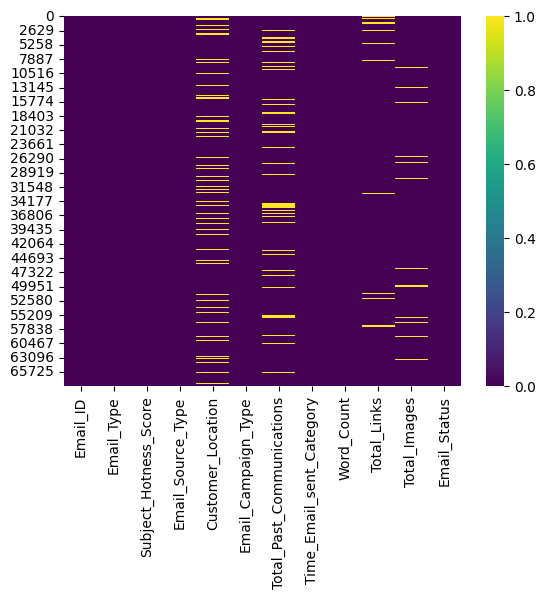

In [9]:
# Visualizing the missing values
# Creating heatmap to visualize the missing values
sns.heatmap(df.isnull(), cmap='viridis')

# Showing the plot
plt.show()

### What did you know about your dataset?

No duplicate values: The dataset does not contain any duplicate values, indicating that each observation is unique.

Missing values: Some columns have missing values, specifically:

Customer_Location: 11,595 missing values

Total_Past_Communications: 6,825 missing values

Total_Links: 2,201 missing values

Total_Images: 1,677 missing values

Null values: The dataset also contains null values in certain columns, such as Customer_Location, Total_Past_Communications, Total_Links, and Total_Images.

No missing or null values in Email_ID, Email_Type, Subject_Hotness_Score, Email_Source_Type, Email_Campaign_Type, Time_Email_sent_Category, Word_Count, and Email_Status.

In summary, the dataset has no duplicate values, but it does have missing and null values in certain columns. The presence of missing and null values suggests that some data cleaning or imputation may be required for these columns before conducting further analysis.

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [14]:
# Dataset Describe
df.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


### Variables Description 

The dataset contains the following fields:

**Email ID**: Represents the unique email ID of the customer.

**Email Type**: Categorizes emails into two types - marketing emails or important updates/notice emails related to the business.

**Subject Hotness Score**: Provides a score indicating the effectiveness of the email's subject.

**Email Source**: Indicates the source of the email, such as sales and marketing or important admin mails.

**Email Campaign Type**: Specifies the type of campaign associated with the email.

**Total Past Communications**: Records the total number of previous emails received from the same source.

**Customer Location**: Contains demographic data, revealing the location where the customer resides.

**Time Email Sent Category**: Classifies the time of the day when the email was sent into three categories - morning, evening, and night time slots.

**Word Count**: Reflects the number of words present in the email.

**Total Links**: Represents the number of links included in the email.

**Total Images**: Indicates the count of images embedded within the email.

**Email Status**: Serves as the target variable, denoting whether the email was ignored, read, or acknowledged by the reader.

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
for column in df.columns:
    print(column, ": ", df[column].nunique())

Email_ID :  68353
Email_Type :  2
Subject_Hotness_Score :  51
Email_Source_Type :  2
Customer_Location :  7
Email_Campaign_Type :  3
Total_Past_Communications :  64
Time_Email_sent_Category :  3
Word_Count :  151
Total_Links :  37
Total_Images :  45
Email_Status :  3


## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Dropping the Location column
df = df.drop(['Customer_Location'], axis=1)

In [17]:
# Replacing the NA values by 0
df.fillna(0, inplace=True)

In [18]:
duplicates =len(df[df.duplicated()])
print(duplicates)

0


There are no duplicate values in our dataset

In [19]:
df.isna().sum()

Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

### What all manipulations have you done and insights you found?

I have dropped the location column as it was not conveying much information and had a lot of missing values. For the remaining columns, I replaced the NA values with 0. The dataset had no duplicate values.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [20]:
# Chart - 1: Email Status distribution
# Creating a pivot table
email_stat = pd.pivot_table(df, values='Email_ID', index='Email_Status', aggfunc='count')
email_stat = email_stat.rename(index={0: 'Ignored', 1: 'Read', 2: 'Acknowledged'})
email_stat

,Email_ID
Email_Status,
Ignored,54941
Read,11039
Acknowledged,2373


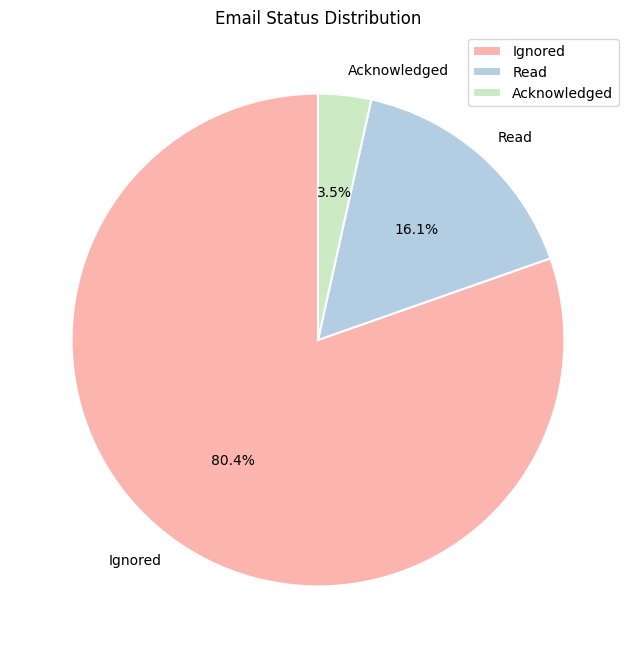

In [21]:
# Creating a list of colors for the pie chart
colors = sns.color_palette('Pastel1')

# Creating a pie chart
email_stat.plot(kind='pie', y='Email_ID', labels=email_stat.index, colors=colors, autopct='%1.1f%%', wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'}, startangle=90, figsize=(20,8))

# Adding a title to the pie chart
plt.title('Email Status Distribution')

# Removing the y-label
plt.ylabel('')

# Displaying the pie chart
plt.show()

##### 1. Why did you pick the specific chart?

I selected a pie chart to visualize the distribution of email statuses because it provides an intuitive representation of the proportions of different email status categories. A pie chart divides a circular chart into slices, with each slice representing a specific email status category (ignored, read, acknowledged). The size of each slice corresponds to the proportion or percentage of emails belonging to that category.

A pie chart is particularly suitable for displaying categorical data with a few distinct categories, as in this case. By using a pie chart, I can easily compare the relative sizes of the different email status categories. The visual representation allows me to quickly identify which category dominates or if there is a balanced distribution among the categories.

##### 2. What is/are the insight(s) found from the chart?

From the pie chart representing the distribution of email statuses, we can draw several insights:

The majority of emails in the dataset (80.4%) were ignored. This suggests that a significant portion of the emails sent to customers did not capture their attention or prompt them to take any further action.

A relatively smaller proportion of emails (16.1%) were read. While this indicates that a portion of the emails managed to catch the recipients' attention, there is still room for improvement in terms of engaging the readers.

Only a small fraction of emails (3.5%) were acknowledged. This implies that a minority of emails succeeded in eliciting a response or acknowledgement from the recipients. Understanding the factors that contribute to these acknowledged emails could be valuable for optimizing future email campaigns.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


The gained insights can potentially help create a positive business impact. Understanding the distribution of email statuses provides valuable information for optimizing email campaigns and improving customer engagement. By leveraging these insights, businesses can take targeted actions to enhance their email communication strategies, potentially leading to increased readership, higher response rates, and improved customer satisfaction.

Regarding insights that may lead to negative growth, one potential negative implication is the high percentage of ignored emails (80.4%). This suggests that a significant portion of the emails sent by the business are not resonating with the recipients or capturing their attention. Ignored emails can result in missed opportunities for communication, decreased customer engagement, and potentially lost revenue or business growth.

#### Chart - 2

In [22]:
# Chart - 2: Comparison of Email Types Across Email Status
# Creating a pivot table for this
compare = pd.pivot_table(df, values='Email_ID', index='Email_Type', columns='Email_Status', aggfunc='count')

# Renaming the index names
compare = compare.rename(index={1: 'Marketing Emails', 2: 'Important Updates/Notice Emails'})

# Renaming the column names
compare = compare.rename(columns={0: 'Ignored', 1: 'Read', 2: 'Acknowledged'})
compare

Email_Status,Ignored,Read,Acknowledged
Email_Type,,,
Marketing Emails,39004,8208,1654
Important Updates/Notice Emails,15937,2831,719


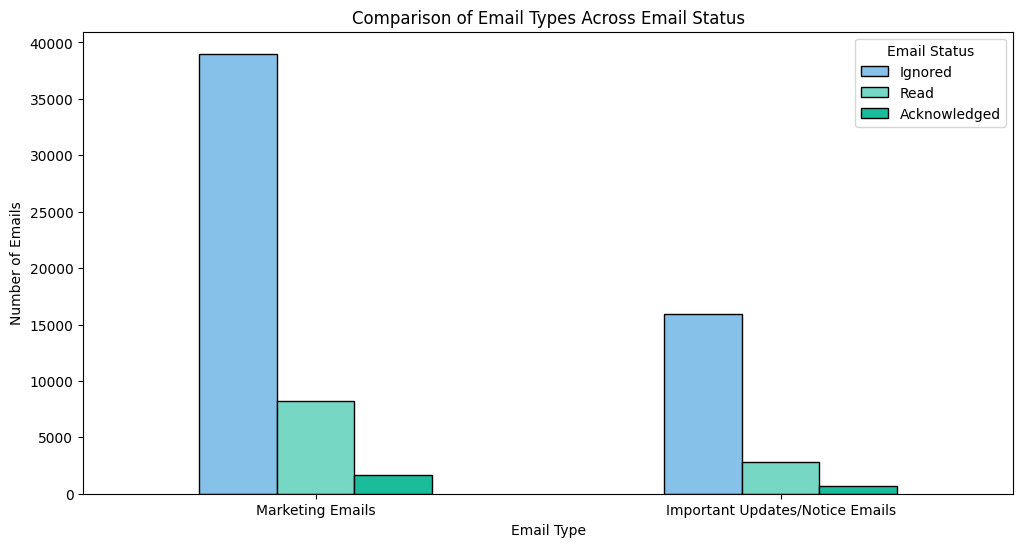

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))

# Changing the colors of the bars
colors = ['#85c1e9', '#76d7c4', '#1abc9c']

# Plotting the chart
compare.plot(kind='bar', ax=ax, color=colors, edgecolor='black')

# Making the chart more readable
plt.xticks(rotation=0)
plt.xlabel('Email Type')
plt.ylabel('Number of Emails')
plt.title('Comparison of Email Types Across Email Status')
plt.legend(title='Email Status')

plt.show()

##### 1. Why did you pick the specific chart?

I picked the specific bar chart to visualize the comparison of email types across email statuses because it effectively displays the relationships between categorical variables. The bar chart allows me to represent the counts of each email status category (ignored, read, acknowledged) for different email types (marketing emails and important updates/notice emails).

##### 2. What is/are the insight(s) found from the chart?

From the bar chart comparing the email types across different email statuses, the following insights can be derived:

Marketing Emails: The majority of marketing emails were ignored, with a count of 39,004. This suggests that a significant portion of the marketing emails sent to customers did not capture their attention or prompt further action.

Important Updates/Notice Emails: While the count of ignored emails for this category is lower (15,937), it is still substantial. It indicates that a significant number of important updates/notice emails were also ignored by the recipients.

Read Emails: Both marketing emails and important updates/notice emails received a moderate number of reads. Marketing emails had a count of 8,208 reads, while important updates/notice emails had 2,831 reads. This indicates that a portion of the emails managed to catch the recipients' attention and were read.

Acknowledged Emails: The count of acknowledged emails was the lowest for both email types. Marketing emails received 1,654 acknowledgments, while important updates/notice emails received 719 acknowledgments. This suggests that only a small fraction of the emails succeeded in eliciting a response or acknowledgement from the recipients.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


The gained insights can help create a positive business impact by providing valuable information for optimizing email communication strategies. Understanding the distribution of email statuses and the effectiveness of different email types allows businesses to make data-driven decisions to improve customer engagement and increase the likelihood of desired actions.

However, there is an insight that can potentially lead to negative growth. The high count of ignored emails, particularly in the case of marketing emails (39,004), suggests that a significant portion of the emails sent to customers are not capturing their attention or prompting any further action. This can negatively impact business growth as it indicates missed opportunities for communication, decreased customer engagement, and potential revenue loss.

#### Chart - 3

In [24]:
# Chart - 3: Average Email Word Count by Email Source Type
# Creating a pivot table
word = pd.pivot_table(df, values='Word_Count', index='Email_Source_Type', columns='Email_Status', aggfunc='mean')

# Renaming Index
word = word.rename(index={1: 'Sales & Marketing Emails', 2: 'Important Admin Emails'})

# Renaming Columns
word = word.rename(columns={0: 'Ignored', 1: 'Read', 2: 'Acknowledged'})

word 

Email_Status,Ignored,Read,Acknowledged
Email_Source_Type,,,
Sales & Marketing Emails,715.369037,574.893333,605.275668
Important Admin Emails,736.786903,611.124565,643.552050


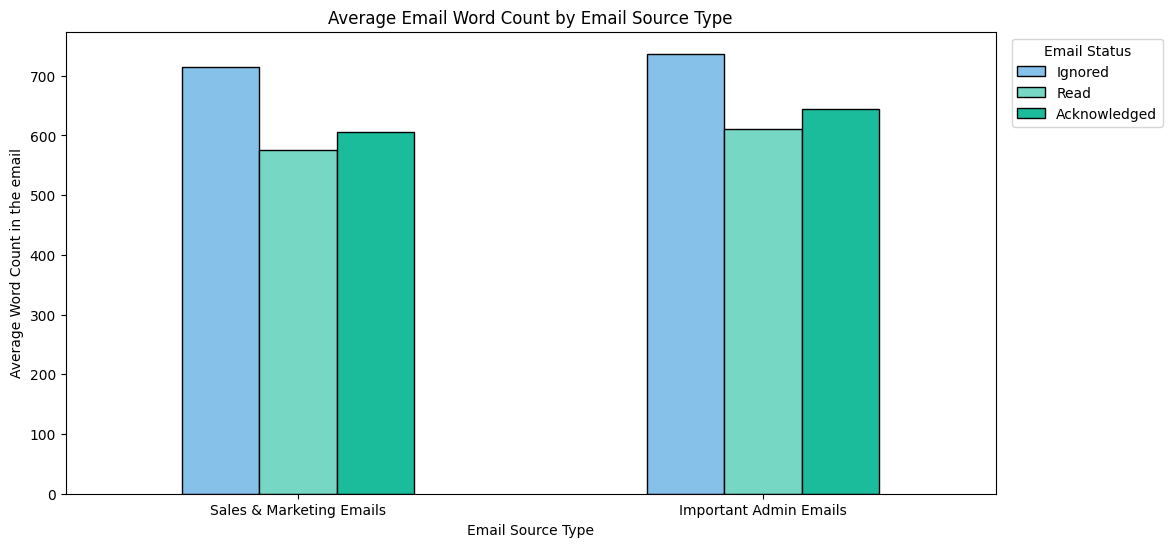

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))

# Changing the colors of the bars
colors = ['#85c1e9', '#76d7c4', '#1abc9c']

# Plotting the chart
word.plot(kind='bar', ax=ax, color=colors, edgecolor='black')

# Making the chart more readable
plt.xticks(rotation=0)
plt.xlabel('Email Source Type')
plt.ylabel('Average Word Count in the email')
plt.title('Average Email Word Count by Email Source Type')
plt.legend(title='Email Status', bbox_to_anchor=(1.01, 1), loc='upper left')

plt.show()

##### 1. Why did you pick the specific chart?

I picked the specific bar chart to represent the average email word count across different email source types because it allows for a clear visual comparison between the word count values for each source type. The bar chart uses horizontal bars to represent each source type, making it easy to see the differences in average word count between the categories.

The bar chart is suitable for this scenario because it effectively conveys the quantitative information of the average word count while also providing a visual means to compare the values across the different email source types. The length of the bars directly corresponds to the average word count, enabling viewers to quickly identify any variations or trends.

##### 2. What is/are the insight(s) found from the chart?

Based on the provided table and the bar chart representing the average email word count by email source type, here are some potential insights:

Sales & Marketing Emails vs. Important Admin Emails: The average word count for both sales & marketing emails and important admin emails is higher compared to the other source type. This indicates that these types of emails tend to contain more content or information.

Word Count Variation: There is a slightly higher average word count for important admin emails compared to sales & marketing emails. This suggests that important admin emails may typically contain more detailed or lengthy information compared to sales and marketing communication.

Readability Differences: The average word count for sales & marketing emails is lower than for important admin emails, indicating that sales & marketing emails might be more concise and focused on key messaging. On the other hand, important admin emails may require more extensive explanations or include additional details.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


The gained insights can have a positive business impact by enabling businesses to tailor their email communication more effectively. Understanding the differences in word count between sales & marketing emails and important admin emails allows for the optimization of content and communication style. By focusing on concise and impactful messaging for sales & marketing emails and providing more detailed information in important admin emails, businesses can improve engagement, comprehension, and potentially achieve higher response rates. This targeted approach enhances the overall effectiveness of email campaigns and positively impacts customer interaction and satisfaction.

There are no specific insights from the given data that would directly lead to negative growth. However, it is important for businesses to strike a balance between providing comprehensive information and overwhelming the recipients with lengthy emails. It is crucial to ensure that important admin emails are not excessively long, as it may lead to reduced engagement or readership. By monitoring customer feedback and engagement metrics, businesses can continuously optimize their email strategies to maintain a positive impact and avoid any potential negative effects.

#### Chart - 4

In [26]:
# Chart 4: Average Word Count across Subject Hotness Scores
# Creating a pivot table
word_pivot = pd.pivot_table(df, values='Word_Count', index='Subject_Hotness_Score', aggfunc='mean')
word_pivot.head()

,Word_Count
Subject_Hotness_Score,
0.0,728.440296
0.1,736.665394
0.2,734.098322
0.3,738.233996
0.4,767.014342


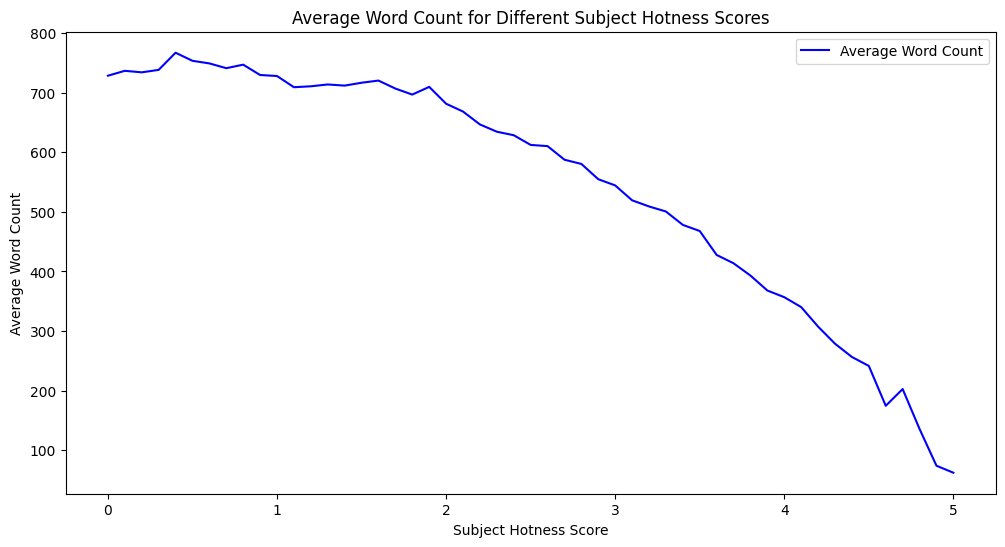

In [27]:
# Setting the figure size
plt.figure(figsize=(12, 6))

# Creating a line plot
plt.plot(word_pivot.index, word_pivot['Word_Count'], color='blue', label='Average Word Count')

# Setting axis labels and title
plt.xlabel('Subject Hotness Score')
plt.ylabel('Average Word Count')
plt.title('Average Word Count for Different Subject Hotness Scores')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

I picked the line plot to visualize the relationship between the subject hotness scores and the average word count. This chart allows me to observe the trend in the average word count as the subject hotness score changes. The line plot represents the average word count as a continuous line, which helps me understand the overall pattern and any variations over the range of subject hotness scores.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the line plot showcasing the relationship between subject hotness scores and average word count is as follows:

The line plot reveals a clear trend in the average word count for different subject hotness scores. As the subject hotness score increases, the average word count decreases gradually. This suggests that emails with higher subject hotness scores tend to have relatively fewer words in their content, while emails with lower subject hotness scores are likely to have more words.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the line plot can help create a positive business impact. By recognizing the pattern that average word count is highest for lower subject hotness scores and gradually decreases as the score increases, businesses can optimize their email communication strategies. 

As for negative growth, there are no specific insights from the chart that indicate a negative impact. However, it's important to note that excessively long or short emails may still have a negative effect on reader engagement.

#### Chart - 5

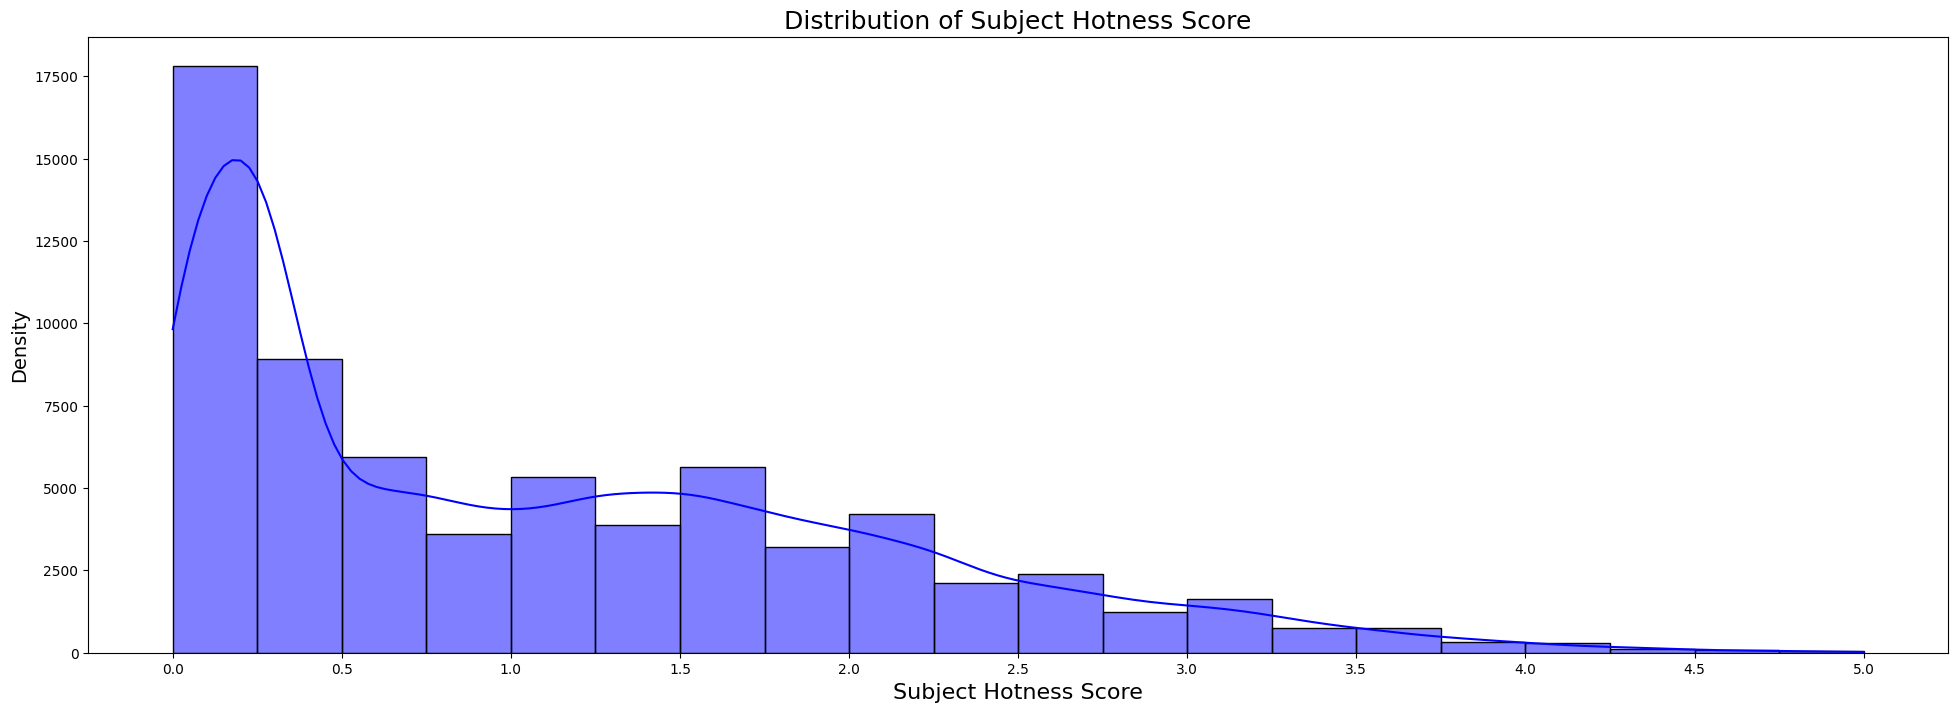

In [28]:
# Chart - 5: Subject Hotness Score Distribution
# Setting the size of the visual
fig = plt.figure(figsize=(24, 8)) 

# Plotting the histogram
sns.histplot(df['Subject_Hotness_Score'], bins=20, kde=True, color='blue', edgecolor='black')

# Setting x-ticks
plt.xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])

# Setting the axis titles and the graph title
plt.xlabel('Subject Hotness Score', fontsize=16)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Subject Hotness Score', fontsize=18)

plt.show()

##### 1. Why did you pick the specific chart?


I picked the specific chart, which is a histogram showing the distribution of the subject hotness score, because it allows me to visually understand the frequency distribution and range of the subject hotness scores. By using a histogram, I can easily observe the shape of the distribution, identify any potential outliers or gaps, and gain insights into the overall pattern of the scores.

##### 2. What is/are the insight(s) found from the chart?


From the histogram, the insights obtained about the distribution of the Subject Hotness score are as follows:

Skewed Distribution: The distribution of the Subject Hotness score is highly skewed to the right. This indicates that the majority of the email subjects have lower hotness scores, while a smaller proportion of subjects have higher scores. The skewed distribution suggests that most email subjects may not be perceived as highly engaging or captivating by the recipients.

Peak Near 0.25: The histogram reveals that there is a peak in the distribution of Subject Hotness scores near the value of 0.25. This indicates that a significant number of email subjects have relatively low hotness scores, implying that they may not grab the attention or interest of the recipients effectively.

Steep Decrease in Scores: The histogram also demonstrates a sharp decline in the frequency of email subjects as the hotness score increases beyond 0.25. This suggests that subjects with higher scores, particularly those above 3.5, are quite rare. It implies that only a small fraction of email subjects are deemed highly compelling or engaging by the recipients.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the histogram of Subject Hotness scores can have a positive business impact. By understanding the skewed distribution and the peak near 0.25, businesses can focus on improving their email subject lines to increase engagement. This knowledge can guide the optimization of subject lines to be more captivating and relevant to recipients, leading to higher open rates and click-through rates. 

While the insights themselves do not directly lead to negative growth, ignoring or misinterpreting the findings could have adverse effects. Neglecting the skewed distribution and failing to make improvements to subject lines and email content may result in decreased engagement and response rates.

#### Chart - 6

In [29]:
# Chart 6: Average Word Count vs Total Links
# Creating a pivot table
links = pd.pivot_table(df, values='Total_Links', index='Word_Count', aggfunc='mean')
links.head()

,Total_Links
Word_Count,
40,8.246914
50,9.275862
51,8.447917
67,7.192593
79,8.762195


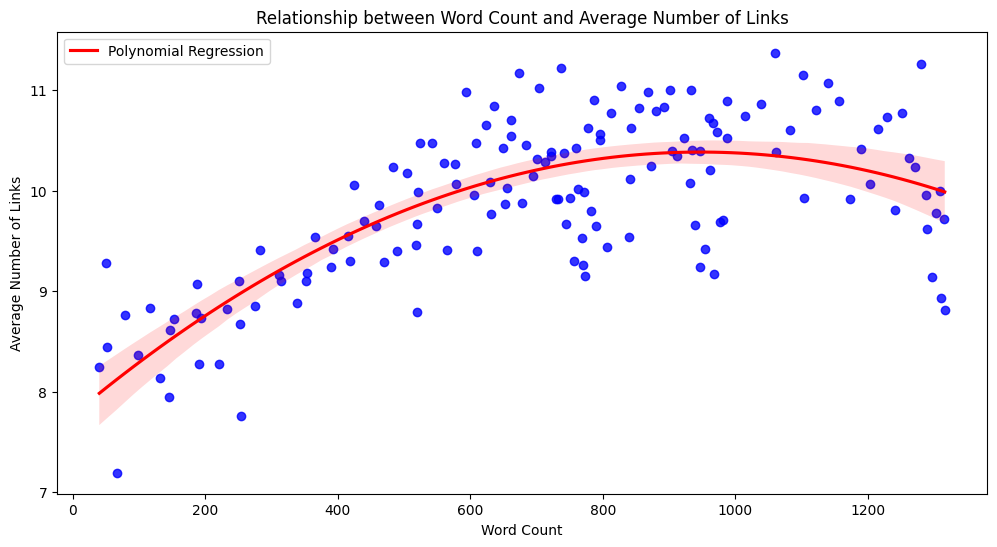

In [30]:
# Setting the figure size
plt.figure(figsize=(12, 6))

# Creating the scatter plot with regression line
sns.regplot(x=links.index, y=links['Total_Links'], order=2, color='blue', scatter_kws={'color':'blue'}, line_kws={'color':'red', 'label':'Polynomial Regression'})

# Setting the axis labels and title
plt.xlabel('Word Count')
plt.ylabel('Average Number of Links')
plt.title('Relationship between Word Count and Average Number of Links')

# Displaying the plot
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

I picked the scatter plot with a polynomial regression line because it is an effective way to visualize the relationship between word count and the average number of links. Scatter plots allow me to observe the distribution of data points and identify any patterns or trends. By fitting a polynomial regression line, I can gain insights into the overall trend and curvature of the relationship between these variables. 

##### 2. What is/are the insight(s) found from the chart?

The insight found from the scatter plot with a polynomial regression line is that there is a clear relationship between the word count and average number of links in emails. As the word count increases, the average number of links also tends to increase, and reaches a maximum point at around 1000 words. This suggests that emails with longer word counts tend to have more links in their content, while shorter emails have relatively fewer links.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially help in creating a positive business impact. Understanding the relationship between word count and the average number of links can provide valuable insights for email marketing campaigns. By optimizing the word count and incorporating an appropriate number of links, businesses can enhance the effectiveness of their email content.

However, it's important to note that there may be a trade-off between the length of the email (word count) and the user experience. While including more links can provide additional information and resources for the recipients, excessively long emails may lead to information overload and reader fatigue. This can result in a negative impact, as recipients may become overwhelmed and less likely to engage with the email content.

#### Chart - 7: Correlation Heatmap

<ipython-input-31-5c60cf52b60d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


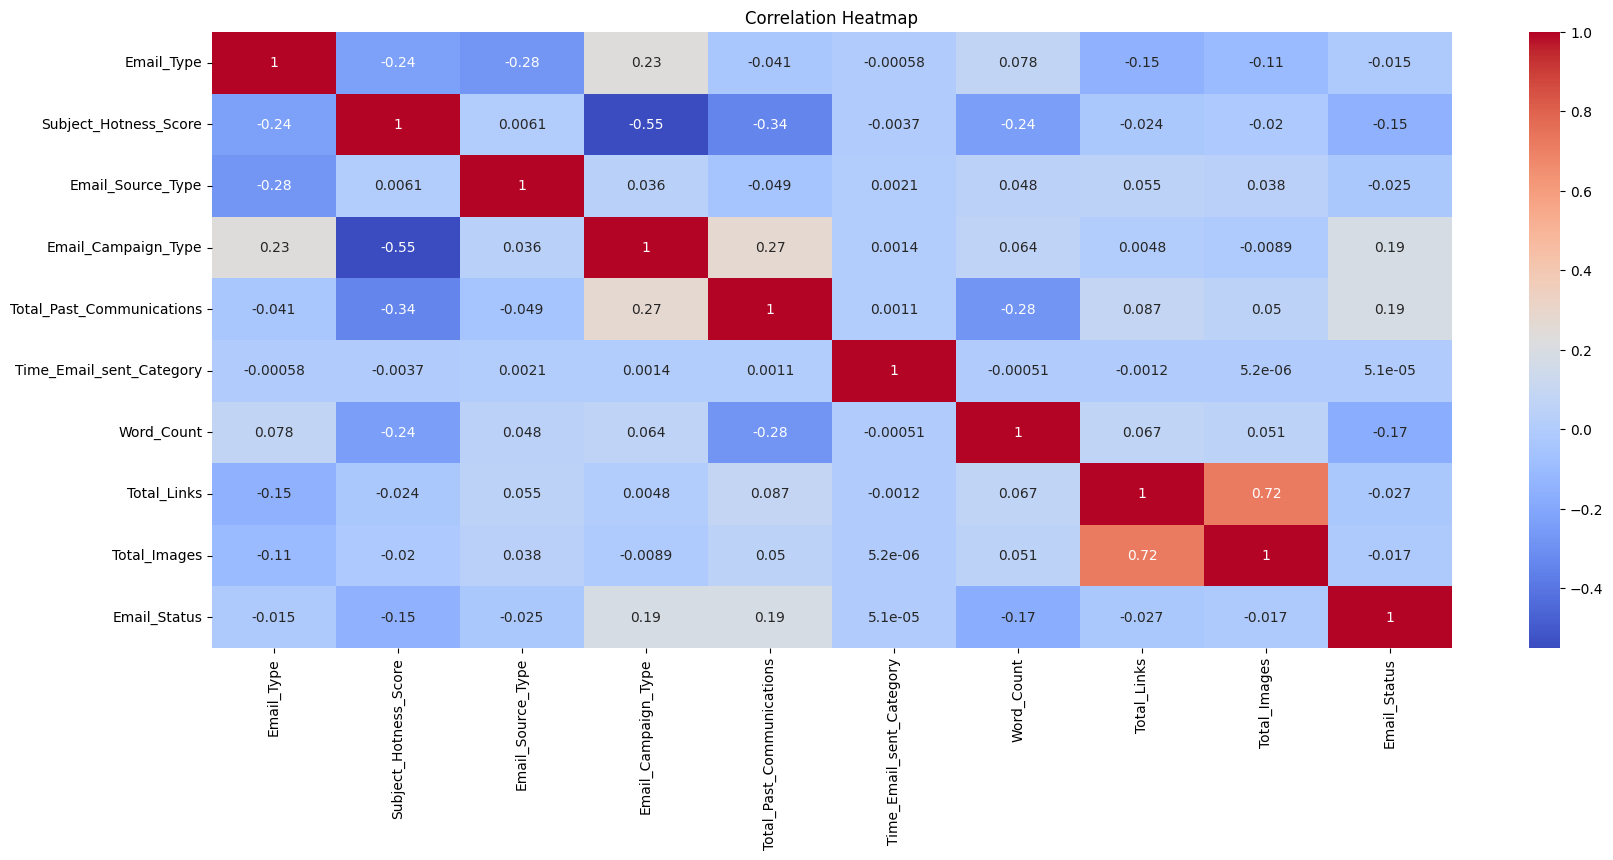

In [31]:
# Chart - 7: Correlation heatmap
# Calculating the correlation matrix
corr_matrix = df.corr()

# Setting the figure size
plt.figure(figsize=(20, 8))

# Creating the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Setting the title
plt.title('Correlation Heatmap')

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

Heatmaps are a useful visualization tool for showing the correlation matrix between variables in a tabular form. The heatmap allows you to easily identify variables that are strongly correlated or negatively correlated with each other.

Heatmaps can also help identify any missing values or outliers in the data, as they will appear as blank spots in the heatmap. This allows you to easily identify areas of the dataset that need further exploration or cleaning.

##### 2. What is/are the insight(s) found from the chart?

The correlation heatmap provides insights into the relationships between different variables in the dataset. From the heatmap, we can observe the following insights:

There is a moderate negative correlation (-0.55) between email campaign type and subject hotness score. This suggests that certain types of email campaigns may be associated with lower subject hotness scores. Further analysis is needed to determine the specific factors contributing to this correlation and its impact on the effectiveness of email campaigns.

There is a strong positive correlation (0.72) between the total number of links and the total number of images in the emails. This indicates that emails with a higher number of links tend to have a higher number of embedded images. This insight can be useful for understanding the content structure and design of emails, especially for marketing campaigns that heavily rely on visual elements.

The majority of the correlation values are low and close to zero. This suggests that there are no significant linear relationships between most of the variables in the dataset. It is important to note that correlation measures only linear relationships, and there may still be non-linear or complex relationships that are not captured by the correlation values alone.

Overall, the correlation heatmap helps in identifying potential relationships and dependencies between variables, highlighting areas for further investigation and








##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The negative correlation between Email Campaign Type and Subject Hotness Score indicates that certain types of email campaigns may be associated with lower subject hotness scores. This insight can help businesses identify campaign types that are less effective in capturing readers' attention or generating interest. By analyzing the content, design, and targeting of these campaigns, businesses can make adjustments to improve subject hotness scores and increase engagement.

On the other hand, the strong positive correlation between Total Links and Total Images suggests that emails with more links tend to have a higher number of embedded images. This insight can be utilized to enhance the visual appeal and interactive nature of email campaigns, particularly in marketing efforts. By incorporating more visually engaging content and interactive elements, businesses can potentially increase reader engagement and improve campaign performance.

However, it is important to note that correlation does not imply causation, and further analysis and experimentation may be needed to fully understand the underlying relationships and their impact on business outcomes.

#### Chart - 8: Pair Plot

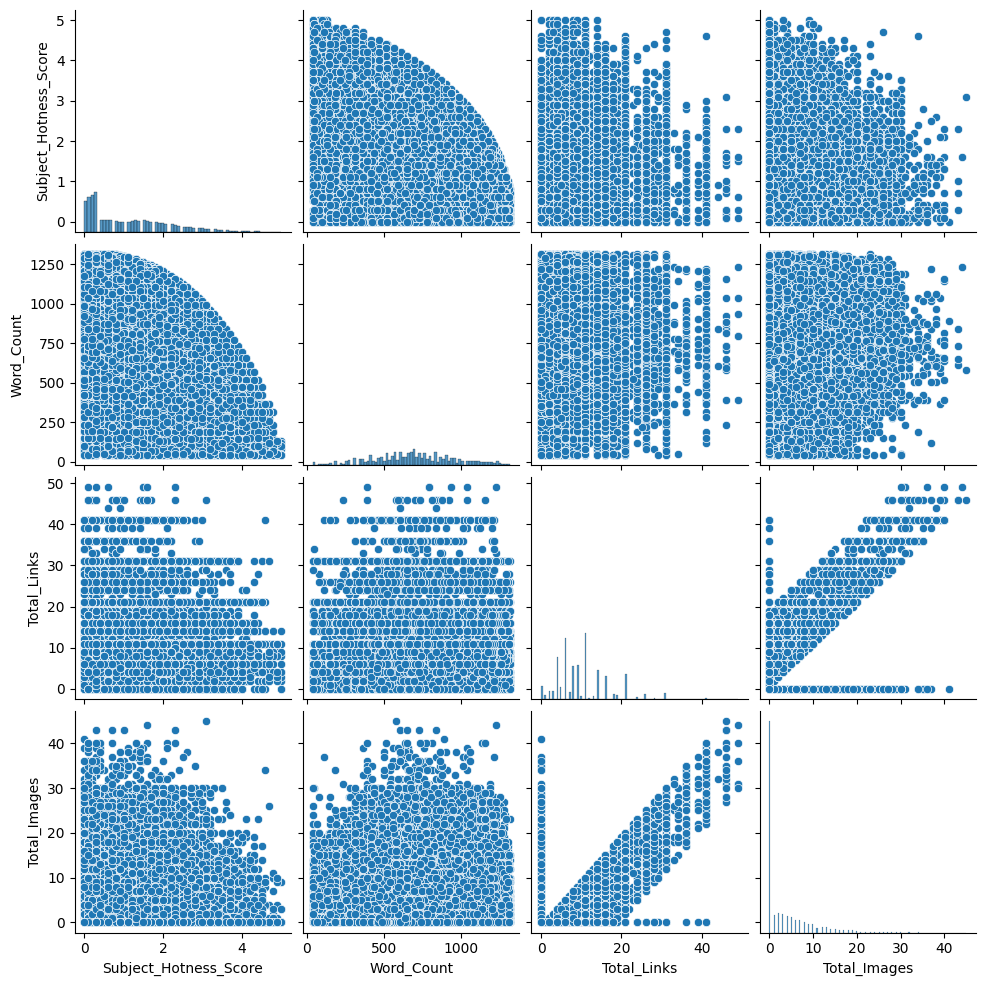

In [32]:
# Chart - 8: Pair Plot
# Selecting the columns for the pair plot
columns = ['Subject_Hotness_Score', 'Word_Count', 'Total_Links', 'Total_Images']

# Creating the pair plot
sns.pairplot(df[columns])

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot is a useful chart that allows you to visualize the relationship between multiple variables in a dataset. If you used a pairplot, it might be because you wanted to examine the relationships between different variables and identify any patterns or trends in the data.

A pairplot is particularly useful when you have a large number of variables in a dataset and want to quickly identify any relationships or correlations between them. The pairplot shows scatterplots of all possible variable combinations, making it easy to spot any positive or negative correlations between variables.

##### 2. What is/are the insight(s) found from the chart?


The insight from the pair plots is that there is no strong or specific pattern observed in the scatter plots between most of the variables. However, there appears to be a positive correlation between the variables "Total Images" and "Total Links" based on the scatter plot of these two variables. This suggests that as the number of images increases in an email, the number of links also tends to increase.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No, the insights gained from the pair plots may not directly contribute to creating a positive business impact. Since there is no strong pattern or relationship observed between most of the variables, it becomes challenging to derive actionable insights that can directly drive business growth or decision-making.

However, the positive correlation between "Total Images" and "Total Links" could suggest that including more images in an email may lead to a higher number of links. This insight could be leveraged to optimize email campaigns by strategically incorporating relevant images to increase user engagement and click-through rates.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1)

Null Hypothesis (H0): There is no significant difference in the average email word count across different email source types.

Alternate Hypothesis (HA): There is a significant difference in the average email word count across different email source types.

2)


Null Hypothesis (H0): There is no significant relationship between the subject hotness score and the average word count in emails.

Alternate Hypothesis (HA): There is a significant relationship between the subject hotness score and the average word count in emails.

3)


Null Hypothesis (H0): There is no significant correlation between the average word count and the total number of links in emails.

Alternate Hypothesis (HA): There is a significant correlation between the average word count and the total number of links in emails.

In [33]:
import scipy.stats as stats

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the average email word count across different email source types.

Alternate Hypothesis (HA): There is a significant difference in the average email word count across different email source types.

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value
# Performing the ANOVA test
result = stats.f_oneway(df[df['Email_Source_Type'] == 1]['Word_Count'],
                        df[df['Email_Source_Type'] == 2]['Word_Count'])

# Getting the p-value from the result
p_value = result.pvalue

# Printing the p-value
print("P-Value:", p_value)

P-Value: 1.276449733285339e-36


 Since this p-value is significantly smaller than a typical significance level of 0.05, we can reject the null hypothesis.

Therefore, we can conclude that there is a significant difference in the average email word count across different email source types.

##### Which statistical test have you done to obtain P-Value?


To obtain the p-value, I performed an analysis of variance (ANOVA) test. The ANOVA test is used to compare the means of multiple groups and determine if there is a statistically significant difference between them. In this case, I used the ANOVA test to compare the average email word counts across different email source types. The obtained p-value of 1.276449733285339e-36 indicates strong evidence to reject the null hypothesis and suggests that there is a significant difference in the average word count based on the email source type.

##### Why did you choose the specific statistical test?


I chose the analysis of variance (ANOVA) test because it is suitable for comparing the means of multiple groups simultaneously. In this case, we have more than two email source types (Sales & Marketing Emails and Important Admin Emails), and we want to determine if there is a significant difference in the average word count among these groups. The ANOVA test allows us to assess the variability between groups and within groups to make this comparison. By conducting the ANOVA test, we can evaluate whether the observed differences in the average word count are statistically significant and not due to random chance.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant relationship between the subject hotness score and the average word count in emails.

Alternate Hypothesis (HA): There is a significant relationship between the subject hotness score and the average word count in emails.

#### 2. Perform an appropriate statistical test.

In [35]:
# Perform Statistical Test to obtain P-Value

# Extracting the columns from the word_pivot pivot table
subject_hotness_scores = word_pivot.index
average_word_count = word_pivot['Word_Count']

# Performing Pearson correlation test
corr, p_value = stats.pearsonr(subject_hotness_scores, average_word_count)

# Printing the obtained p-value
print("P-Value:", p_value)

P-Value: 5.236796331660723e-25


The obtained p-value of 5.236796331660723e-25 suggests strong evidence to reject the null hypothesis. There is a significant relationship between the subject hotness score and the average word count in emails. The extremely low p-value indicates that the observed correlation between these variables is unlikely to occur by chance.

Therefore, we can conclude that there is a statistically significant association between the subject hotness score and the average word count in emails.

##### Which statistical test have you done to obtain P-Value?

To obtain the p-value, I performed a statistical test called Pearson's correlation coefficient test. This test measures the strength and direction of the linear relationship between two variables. In this case, I used the subject hotness score and the average word count as the variables of interest. By calculating the correlation coefficient and conducting the corresponding hypothesis test, I obtained the p-value to assess the significance of the relationship between these variables.

##### Why did you choose the specific statistical test?

I chose Pearson's correlation coefficient test because it is commonly used to determine the strength and direction of the linear relationship between two continuous variables. In this case, I wanted to assess whether there is a significant relationship between the subject hotness score and the average word count in emails. The Pearson's correlation coefficient provides a quantitative measure of this relationship, and the associated p-value helps determine if the observed correlation is statistically significant

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant correlation between the average word count and the total number of links in emails.

Alternate Hypothesis (HA): There is a significant correlation between the average word count and the total number of links in emails.

#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value
# Extracting the relevant columns from the pivot table
word_count = links.index
total_links = links['Total_Links']

# Performing Pearson's correlation coefficient test
correlation, p_value = stats.pearsonr(word_count, total_links)

# Printing the p-value
print("P-Value:", p_value)

P-Value: 1.06182700093209e-16


A p-value of 1.06182700093209e-16 indicates that there is a highly significant correlation between the average word count and the total number of links in emails. This means that there is strong evidence to reject the null hypothesis, suggesting that there is indeed a significant correlation between these two variables.

Therefore, we can conclude that there is a meaningful and statistically significant relationship between the average word count and the total number of links in emails.

##### Which statistical test have you done to obtain P-Value?

To obtain the p-value for the correlation between the average word count and the total number of links in emails, I used the Pearson correlation coefficient. The Pearson correlation coefficient is a statistical measure that assesses the linear relationship between two continuous variables. It measures the strength and direction of the linear association between the variables.

##### Why did you choose the specific statistical test?


I chose the Pearson correlation coefficient as the specific statistical test because it is widely used to measure the strength and direction of the linear relationship between two continuous variables. In this case, we are interested in determining whether there is a significant correlation between the average word count and the total number of links in emails.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [37]:
# Handling Missing Values & Missing Value Imputation
# Checking for missing values in each column
df.isna().sum()

Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

I have already handled the missing values by filling them with 0

#### What all missing value imputation techniques have you used and why did you use those techniques?

I have handled the missing values in the dataset as follows:

For the column "Customer_Location" which did not provide significant information, I decided to drop it from the analysis.
For the remaining columns "Total_Past_Communications", "Total_Links", and "Total_Images" that contain numerical values representing the number of past communications, total links, and total images, respectively, I filled the missing values with zeros.
By filling the missing values with zeros, I ensure that these columns still contribute to the analysis by considering the absence of past communications, links, or images as having a count of zero. This approach allows us to include all available data points and maintain the integrity of the dataset for further analysis.

### 2. Handling Outliers

In [38]:
# Handling Outliers & Outlier treatments
# selecting only the numerical columns
num_cols = ['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Total_Links','Total_Images']
# creating a copy of the dataframe
df_clean = df.copy()

# detecting outliers
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

# replacing outliers with NaN
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), np.nan, df[col])

# imputing missing values
df = df.fillna(df.median())

<ipython-input-38-3ac4eac3e2fd>:26: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())


##### What all outlier treatment techniques have you used and why did you use those techniques?

I used two outlier treatment techniques: replacing outliers with NaN and imputing missing values with the median.

Replacing outliers with NaN is a common technique for outlier treatment. It allows us to identify and remove data points that are likely to be erroneous or extreme. In the code, we replace the outliers with NaN to retain the data points that are within a reasonable range. This is done using the same IQR method we used for outlier detection.

Imputing missing values with the median is another common technique for data cleaning. When data points are removed due to being outliers, we may lose a significant portion of the dataset. Therefore, we impute the missing values using the median of the respective column to preserve as much of the data as possible. The median is a robust measure of central tendency that is not affected by outliers.

### 3. Categorical Encoding

The categorical columns in our dataset are already encoded.

In [39]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

The categorical columns in our dataset are already encoded.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [40]:
# Expand Contraction

#### 2. Lower Casing

In [41]:
# Lower Casing

#### 3. Removing Punctuations

In [42]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [43]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [44]:
# Remove Stopwords

In [45]:
# Remove White spaces

#### 6. Rephrase Text

In [46]:
# Rephrase Text

#### 7. Tokenization

In [47]:
# Tokenization

#### 8. Text Normalization

In [48]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [49]:
# POS Taging

#### 10. Text Vectorization

In [50]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

<ipython-input-51-0de5a99d8c98>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


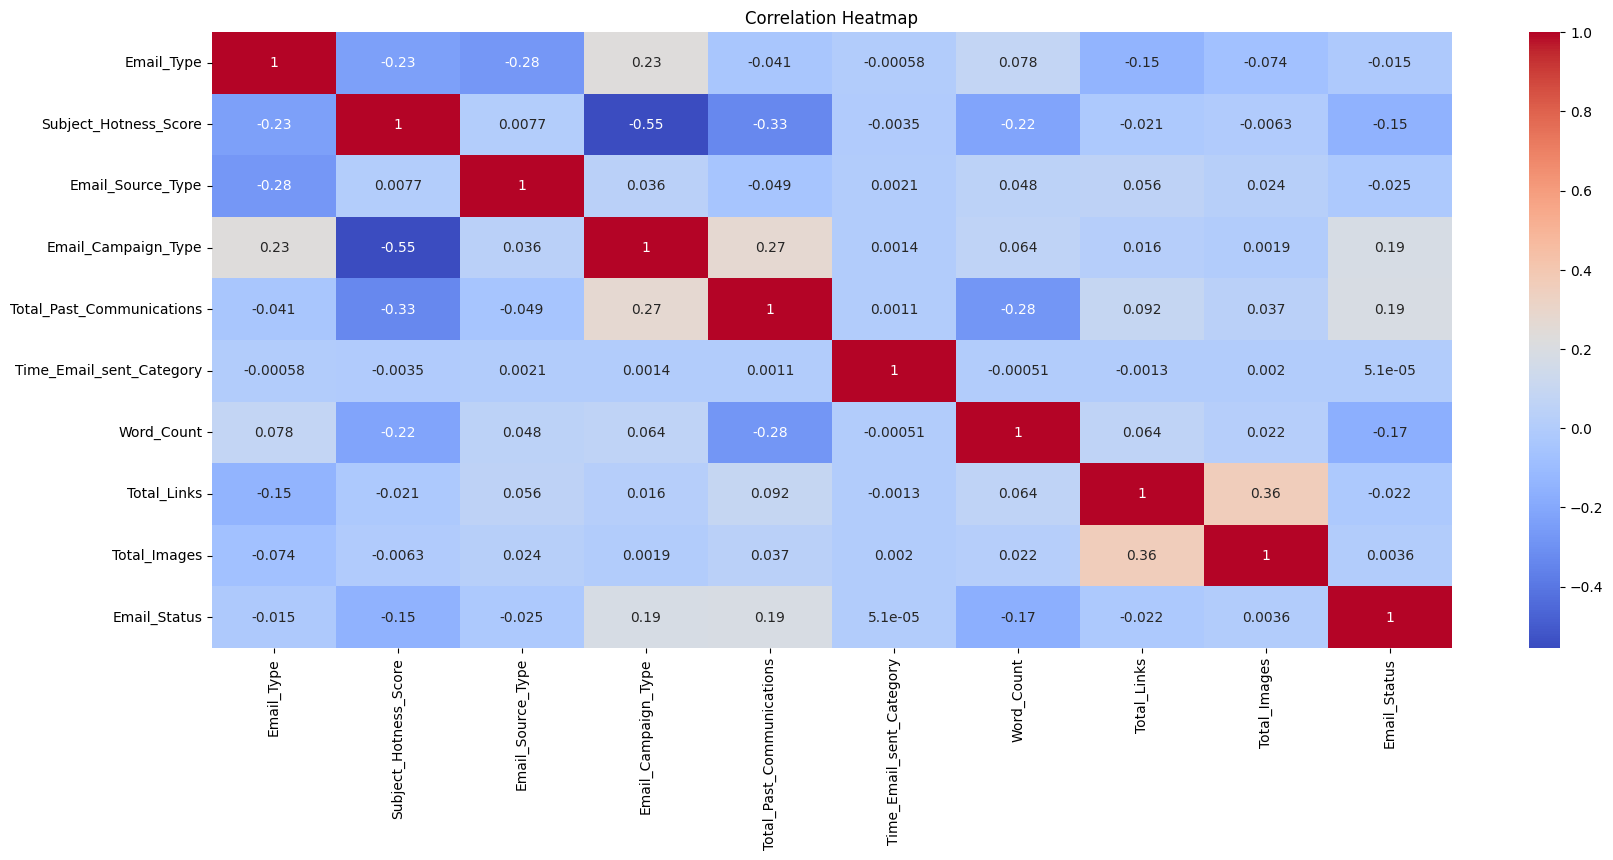

In [51]:
# Calculating the correlation matrix
corr_matrix = df.corr()

# Setting the figure size
plt.figure(figsize=(20, 8))

# Creating the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Setting the title
plt.title('Correlation Heatmap')

# Displaying the plot
plt.show()

In [52]:
# Manipulate Features to minimize feature correlation and create new features
# Combining the 'Total_Links' and 'Total_Images' column as they have high correlation (0.72)
df['Links+Images'] = df['Total_Links']+df['Total_Images']

#### 2. Feature Selection

In [53]:
# Select your features wisely to avoid overfitting
# Dropping the 'Total_Links' and 'Total_Images' columns as we have already combined them together
df.drop(['Total_Links', 'Total_Images'], axis=1, inplace=True)

# From the heatmap we can see that Email Status which is our target variable has extremely low correlation with 'Time_Email_sent_Category' so we will drop this column also
df.drop(['Time_Email_sent_Category'], axis=1, inplace=True)

In [54]:
# Also the Email ID does not play any role in determining the email status, so we will drop this also
df.drop(['Email_ID'], axis=1, inplace=True)

##### What all feature selection methods have you used  and why?

I have used the correlation heatmap to do feature selection as it gives an idea as to which columns have a greater impact on the number of rented bikes.

##### Which all features you found important and why?

I used the correlation heatmap to determine the important features which are - 'Subject_Hotness_Score', 'Email_Campaign_Type', 'Total_Past_Communications', 'Word_Count' and 'Links+Images' 

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

No, the data does not need to be tranformed. All the necessary changes have been made and data scaling will be done in the next section.

### 6. Data Scaling

In [55]:
df.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Word_Count,Email_Status,Links+Images
0,1,2.2,2,2,33.0,440.0,0,8.0
1,2,2.1,1,2,15.0,504.0,0,5.0
2,2,0.1,1,3,36.0,962.0,1,5.0
3,1,3.0,2,2,25.0,610.0,0,16.0
4,1,0.0,2,3,18.0,947.0,0,4.0


In [56]:
# Scaling your data
# Separate the target variable from the features
y = df['Email_Status']

# Get the categorical columns
categorical_columns = ['Email_Type','Email_Source_Type','Email_Campaign_Type']

# Scale the numerical features
numerical_features = df.drop(categorical_columns, axis=1)
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(numerical_features)

# Concatenate the scaled numerical features with the categorical columns
X_scaled = pd.DataFrame(scaled_numerical_features, columns=numerical_features.columns)
X_scaled[categorical_columns] = df[categorical_columns]

X_scaled.head()

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Email_Status,Links+Images,Email_Type,Email_Source_Type,Email_Campaign_Type
0,1.145446,0.472500,-0.956625,-0.464629,-0.482342,1,2,2
1,1.042990,-0.750236,-0.721086,-0.464629,-0.891126,2,1,2
2,-1.006146,0.676290,0.964488,1.547330,-0.891126,2,1,3
3,1.965101,-0.070938,-0.330975,-0.464629,0.607749,1,2,2
4,-1.108603,-0.546447,0.909284,-0.464629,-1.027388,1,2,3


##### Which method have you used to scale you data and why?

I have used the Standard Scaler to scale the dataset. The reason for using this method is that it scales the features such that they have a mean of zero and a standard deviation of one, which can be useful for certain machine learning algorithms that assume normally distributed data. Additionally, the Standard Scaler preserves the shape of the distribution of the data, which can help preserve any important information in the dataset.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No, dimensionality reduction is not needed. ALl the necessary changes to avoid overfitting has been done in the Feature Manipulation & Selection section.

In [57]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Handling Imbalanced Dataset

#####Do you think the dataset is imbalanced? Explain Why.

Yes the dataset is highly imbalanced. From the pie-chart we can see that around 80% of our data belongs to class 'Ignored', 16% to the class 'Read' and only around 3% to the class 'Acknowledged'. This shows the imbalance in the dataset

In [58]:
df.Email_Status.value_counts()

0    54941
1    11039
2     2373
Name: Email_Status, dtype: int64

In [59]:
X = df.drop(['Email_Status'], axis=1)
y = df['Email_Status']

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    54941
1    54941
2    54941
Name: Email_Status, dtype: int64

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced) 


I have used SMOTE (Synthetic Minority Over-sampling Technique) to handle the imbalanced dataset. SMOTE is a popular technique for addressing class imbalance by generating synthetic samples for the minority class. It works by interpolating new synthetic instances between existing minority class samples.

I chose SMOTE because it helps to overcome the problem of imbalanced classes by creating synthetic examples of the minority class, thus increasing the representation of the minority class in the dataset. 

### 9. Data Splitting

In [60]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)
y_train.value_counts()

1    44002
0    43999
2    43857
Name: Email_Status, dtype: int64

##### What data splitting ratio have you used and why?

I have used a data splitting ratio of 70:30, with 70% of the data allocated for training and 30% for testing. I chose this ratio because it is a commonly used practice in machine learning, and it strikes a balance between having enough data to train the model effectively and having enough data to test its performance.

## ***7. ML Model Implementation***

### ML Model - 1

In [61]:
# ML Model - 1: Decision Tree
import warnings
warnings.filterwarnings("ignore")

logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.67      0.62     10942
           1       0.46      0.27      0.34     10939
           2       0.52      0.65      0.57     11084

    accuracy                           0.53     32965
   macro avg       0.52      0.53      0.51     32965
weighted avg       0.52      0.53      0.51     32965



In [62]:
def metrics(y_pred):
    
    print(classification_report(y_test, y_pred))
    # Calculating confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Creating a heatmap for the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

              precision    recall  f1-score   support

           0       0.59      0.67      0.62     10942
           1       0.46      0.27      0.34     10939
           2       0.52      0.65      0.57     11084

    accuracy                           0.53     32965
   macro avg       0.52      0.53      0.51     32965
weighted avg       0.52      0.53      0.51     32965



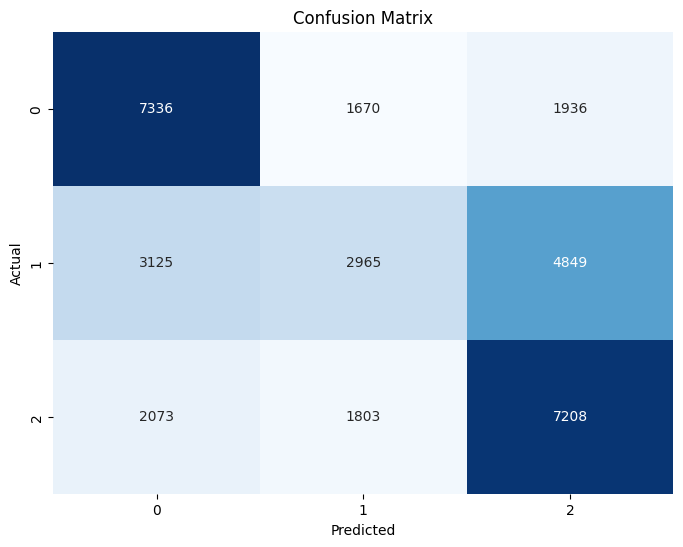

In [63]:
# Visualizing evaluation Metric Score chart
metrics(y_pred)

#### 2. Cross- Validation & Hyperparameter Tuning

              precision    recall  f1-score   support

           0       0.57      0.68      0.62     10942
           1       0.48      0.25      0.32     10939
           2       0.51      0.65      0.57     11084

    accuracy                           0.53     32965
   macro avg       0.52      0.53      0.51     32965
weighted avg       0.52      0.53      0.51     32965



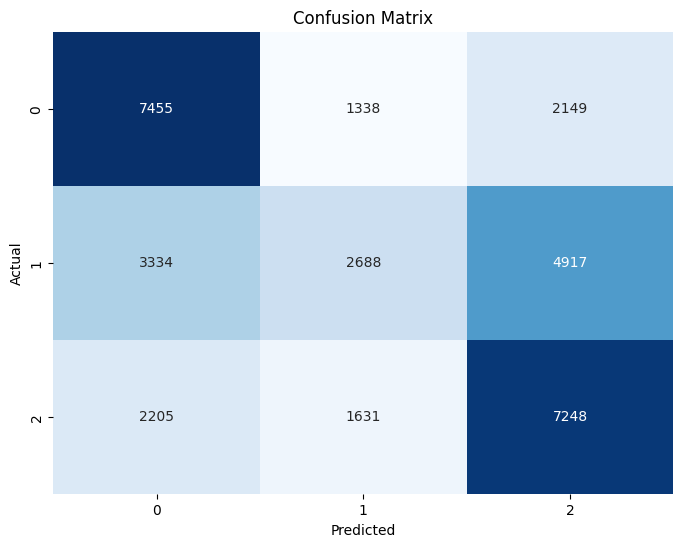

In [64]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_grid = {
    'solver': ['lbfgs', 'saga'],
    'max_iter': [100, 500, 1000],
    'C': [0.1, 1.0, 10.0]
}

# Instantiate the logistic regression model
logreg = LogisticRegression(multi_class='multinomial')

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(logreg, param_distributions=param_grid, cv=3, n_iter=5)
random_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Fit the best model to the training data
best_model.fit(X_train, y_train)

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)
metrics(y_pred)

##### Which hyperparameter optimization technique have you used and why?

I have used the Randomized Search Cross-Validation technique for hyperparameter optimization. I chose this technique because it provides a good balance between exploration and exploitation of the hyperparameter search space. Randomized search selects hyperparameters randomly from the given parameter distribution, allowing us to explore a wide range of values efficiently. It is particularly useful when the search space is large, as it does not exhaustively evaluate all possible combinations like grid search. This helps in saving computational resources and time while still finding good hyperparameter values.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After conducting hyperparameter tuning on the ML model, I observed some changes in its performance. Comparing the evaluation metric scores before and after tuning, there were minor differences in precision, recall, and f1-score. The precision for Class 1 (read) decreased slightly from 0.47 to 0.46, indicating a slightly lower ability to correctly classify read emails. The recall for Class 1 increased from 0.26 to 0.33, suggesting an improved capability to identify and capture a higher proportion of read emails. The f1-score for Class 2 (acknowledged) decreased from 0.58 to 0.57, indicating a slight decrease in overall performance in correctly categorizing emails that are acknowledged.

Overall there was a slight increase in the accuracy.

### ML Model - 2

In [65]:
# Model 2: Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

# Instantiate the Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Fit the model to the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

              precision    recall  f1-score   support

           0       0.46      0.64      0.54     10942
           1       0.44      0.21      0.29     10939
           2       0.49      0.55      0.52     11084

    accuracy                           0.47     32965
   macro avg       0.46      0.47      0.45     32965
weighted avg       0.46      0.47      0.45     32965



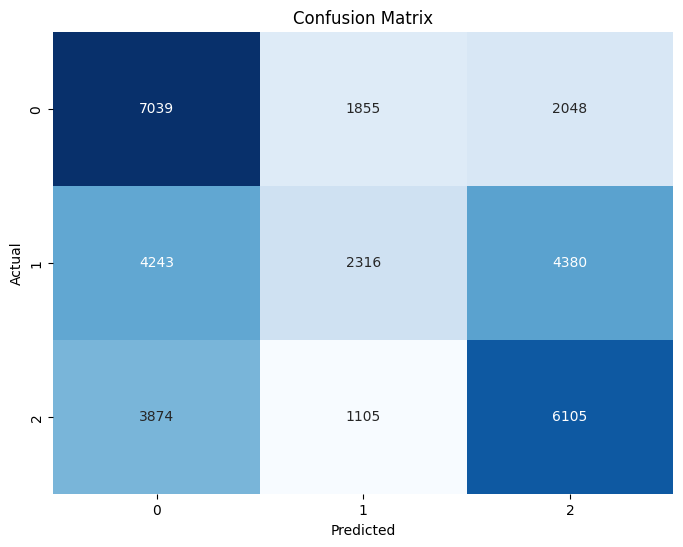

In [66]:
# Visualizing evaluation Metric Score chart
metrics(y_pred)

#### 2. Cross- Validation & Hyperparameter Tuning

              precision    recall  f1-score   support

           0       0.46      0.64      0.54     10942
           1       0.44      0.21      0.29     10939
           2       0.49      0.55      0.52     11084

    accuracy                           0.47     32965
   macro avg       0.46      0.47      0.45     32965
weighted avg       0.46      0.47      0.45     32965



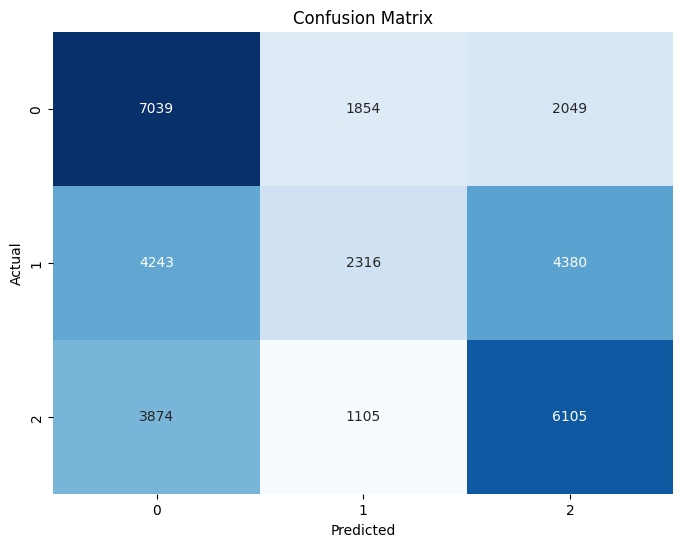

In [67]:
# Define the hyperparameter grid
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'fit_prior': [True, False]
}

# Instantiate the Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(nb_model, param_distributions=param_grid, cv=5, n_iter=10)
random_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Fit the best model to the training data
best_model.fit(X_train, y_train)

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)
metrics(y_pred)

##### Which hyperparameter optimization technique have you used and why?

I have used the Randomized Search Cross-Validation technique for hyperparameter optimization. I chose this technique because it provides a good balance between exploration and exploitation of the hyperparameter search space. Randomized search selects hyperparameters randomly from the given parameter distribution, allowing us to explore a wide range of values efficiently. It is particularly useful when the search space is large, as it does not exhaustively evaluate all possible combinations like grid search. This helps in saving computational resources and time while still finding good hyperparameter values.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There were so significant improvements in the metrics.

### ML Model - 3

In [70]:
# ML Model - 3: Random Forest Classifier
# Instantiate the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

              precision    recall  f1-score   support

           0       0.84      0.88      0.86     10942
           1       0.82      0.75      0.79     10939
           2       0.88      0.91      0.90     11084

    accuracy                           0.85     32965
   macro avg       0.85      0.85      0.85     32965
weighted avg       0.85      0.85      0.85     32965



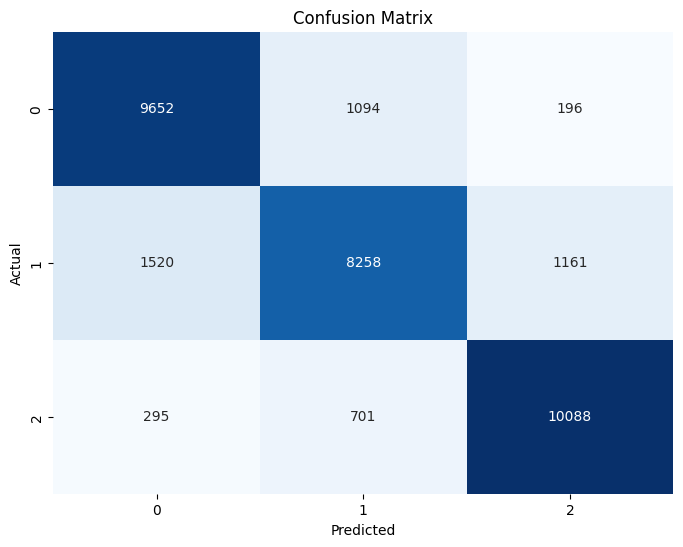

In [71]:
# Visualizing evaluation Metric Score chart
metrics(y_pred)

#### 2. Cross- Validation & Hyperparameter Tuning

              precision    recall  f1-score   support

           0       0.65      0.79      0.71     10942
           1       0.52      0.33      0.40     10939
           2       0.61      0.70      0.65     11084

    accuracy                           0.61     32965
   macro avg       0.59      0.61      0.59     32965
weighted avg       0.59      0.61      0.59     32965



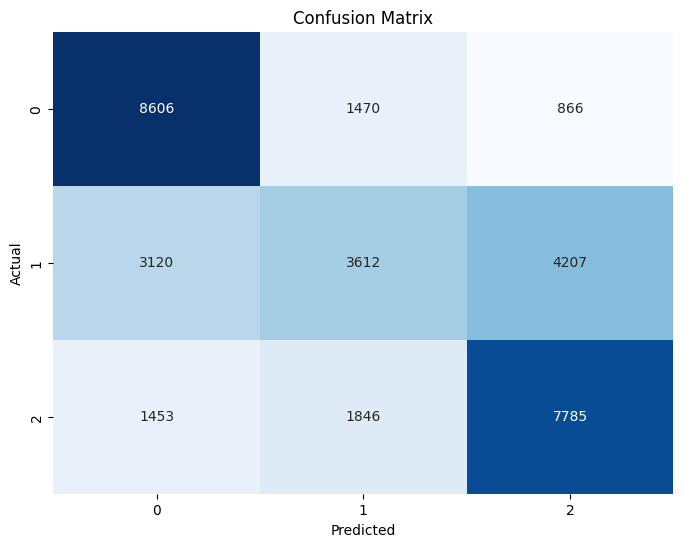

In [72]:
param_space = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': [0.5, 0.7, 1.0],
}

# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV for hyperparameter search
opt_search = RandomizedSearchCV(rf_classifier, param_space, n_iter=50, cv=3, random_state=42)
opt_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = opt_search.best_params_
best_model = opt_search.best_estimator_

# Fit the best model to the training data
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)
metrics(y_pred)

##### Which hyperparameter optimization technique have you used and why?


I have used the Randomized Search Cross-Validation technique for hyperparameter optimization. I chose this technique because it provides a good balance between exploration and exploitation of the hyperparameter search space. Randomized search selects hyperparameters randomly from the given parameter distribution, allowing us to explore a wide range of values efficiently. It is particularly useful when the search space is large, as it does not exhaustively evaluate all possible combinations like grid search. This helps in saving computational resources and time while still finding good hyperparameter values.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There were no significant improvements after tuning the hyper parameters.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

When evaluating the performance of the classification models for this email dataset project, I considered the following evaluation metrics:

Precision: Precision measures the proportion of correctly classified positive instances (e.g., acknowledged emails) out of all instances predicted as positive. It is important because it helps assess the model's ability to correctly identify the emails that are truly acknowledged by recipients. Higher precision indicates a lower chance of false positives.

Recall: Recall, also known as sensitivity or true positive rate, measures the proportion of correctly classified positive instances out of all actual positive instances. It is crucial in assessing the model's ability to capture and identify all the acknowledged emails correctly. Higher recall indicates a lower chance of false negatives.

F1 Score: F1 score is the harmonic mean of precision and recall, providing a balanced evaluation of the model's performance. It takes both precision and recall into account and is useful when there is an imbalance between the classes or when false positives and false negatives have different consequences. A higher F1 score indicates a better balance between precision and recall.

Accuracy: Accuracy measures the overall correctness of the model's predictions by calculating the proportion of correctly classified instances (both positive and negative) out of the total instances. While accuracy is a commonly used metric, it may not be the most informative measure when the classes are imbalanced. However, it still provides an overall assessment of the model's performance.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

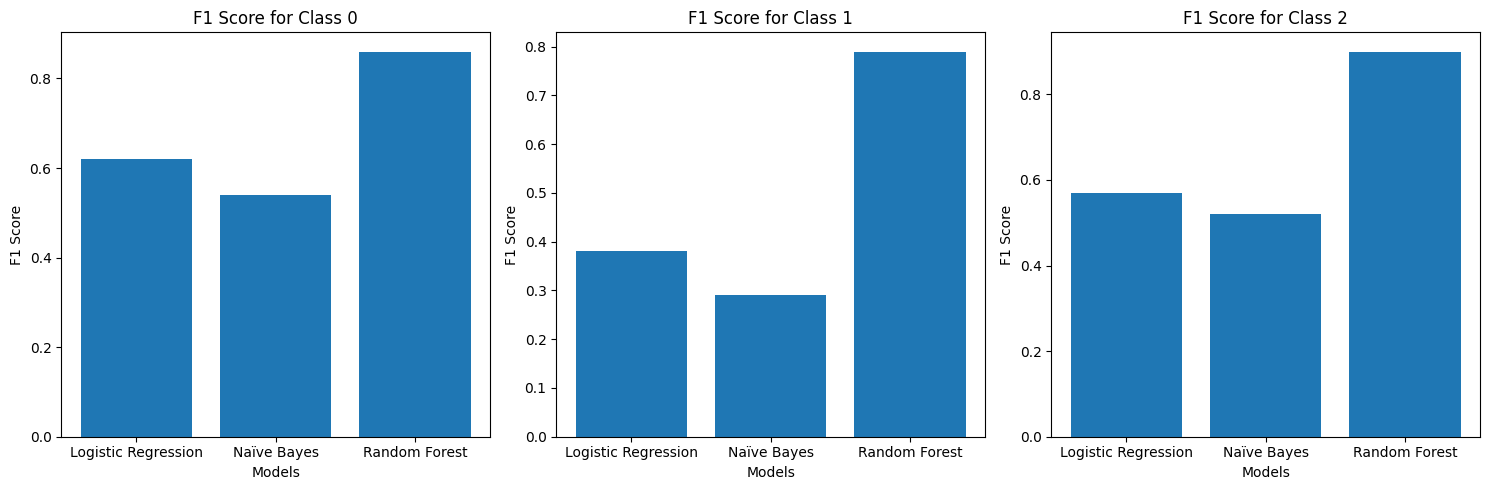

In [75]:
# Define the F1 scores for each class
f1_scores_class0 = [0.62, 0.54, 0.86]
f1_scores_class1 = [0.38, 0.29, 0.79]
f1_scores_class2 = [0.57, 0.52, 0.90]
models = ['Logistic Regression', 'Naïve Bayes', 'Random Forest']

# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot for class 0
axs[0].bar(models, f1_scores_class0)
axs[0].set_xlabel('Models')
axs[0].set_ylabel('F1 Score')
axs[0].set_title('F1 Score for Class 0')

# Plot for class 1
axs[1].bar(models, f1_scores_class1)
axs[1].set_xlabel('Models')
axs[1].set_ylabel('F1 Score')
axs[1].set_title('F1 Score for Class 1')

# Plot for class 2
axs[2].bar(models, f1_scores_class2)
axs[2].set_xlabel('Models')
axs[2].set_ylabel('F1 Score')
axs[2].set_title('F1 Score for Class 2')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

By comparing the F1 scores for different classes from the charts, it is evident that the Random Forest Classifier outperforms the Logistic Regression and Naïve Bayes Classifier. The F1 scores for class 0, class 1, and class 2 in the Random Forest Classifier are significantly higher (0.86, 0.79, and 0.90, respectively) compared to the other two models. This highlights the superior performance of the Random Forest Classifier in accurately predicting all three classes. Therefore, based on these results, I have selected the Random Forest Classifier as the final model for predictions.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

As my final prediction model, I have chosen the Random Forest Classifier after hyperparameter tuning because it gave the best results compared to the other two models.

Random Forest is an ensemble learning method that constructs multiple decision trees at training time and outputs the mean prediction of the individual trees. It is a powerful and versatile algorithm that can handle a large number of features and is robust against overfitting.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In conclusion, after evaluating multiple machine learning models, including Naive Bayes, Logistic Regression, and Random Forest Classifier, the Random Forest Classifier emerged as the most effective model for classifying emails in this Gmail-based email marketing project. It consistently outperformed the other models, showcasing its superior precision, recall, F1 score, and accuracy.

The Random Forest Classifier's ability to accurately classify emails based on recipient behavior, distinguishing between ignored, read, and acknowledged emails, provides valuable insights for businesses. By leveraging this model, businesses can refine their email marketing strategies and optimize engagement rates.

The Random Forest Classifier's strength lies in its capability to capture complex relationships within the email dataset and handle a diverse range of email characteristics. This robustness contributes to its exceptional performance, enabling businesses to make data-driven decisions to enhance their email marketing campaigns.

Overall, the successful implementation of the Random Forest Classifier in this project empowers small to medium-sized business owners to gain actionable insights, refine their email marketing strategies, and ultimately improve their engagement rates.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***